In [19]:
# !pip install scikit-fuzzy --quiet

In [20]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [21]:
preco = ctrl.Antecedent(np.arange(40000, 100000, 1), 'preço')
consumo = ctrl.Antecedent(np.arange(11, 18, 1), 'consumo')

beneficio = ctrl.Consequent(np.arange(0, 11, 0.5), 'benefício')

In [22]:
preco.automf(number=3, names=['baixo', 'medio', 'alto'])
consumo.automf(number=3, names=['alto', 'medio', 'baixo'])
# consumo é uma variável descrescente na importância, o número pequeno não é
# bom, conforme vai aumentando que melhora

# quanto maior a quantidade de km que o veiculo faz com um litro de gasolina, mais baixo é o consumo

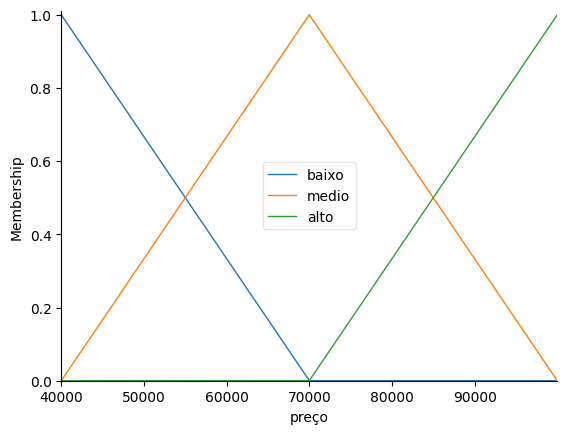

In [23]:
preco.view()

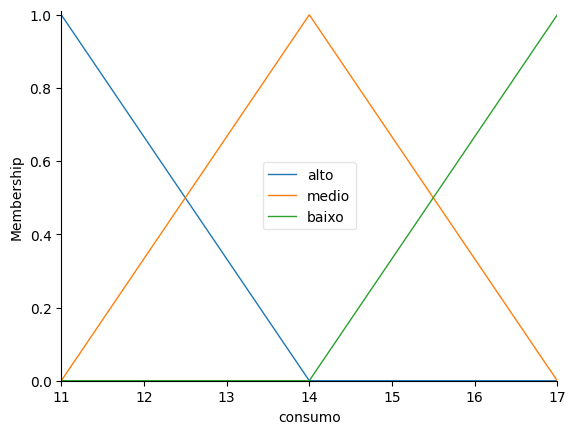

In [24]:
consumo.view()

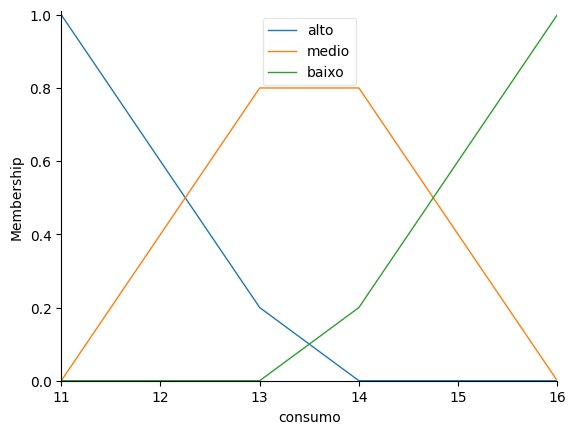

In [25]:
consumo = ctrl.Antecedent(np.arange(11, 17, 1), 'consumo')
consumo.automf(number=3, names=['alto', 'medio', 'baixo'])
consumo.view()

# O gráfico fica quebrado pois está de uma em uma unidade

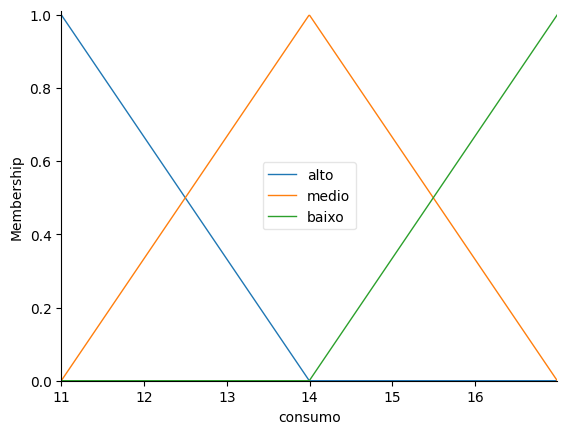

In [27]:
consumo = ctrl.Antecedent(np.arange(11, 17, 0.01), 'consumo')
consumo.automf(number=3, names=['alto', 'medio', 'baixo'])
consumo.view()